# How to do a perfect Twitter sentiment analysis using Twitter API

Inspiration: https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795

The aim is to analyse and to preprocess the tweets using Twitter API.

The first goal is to analyse individual tweets as positive, negative and neutral.

In this notebook the difference between polarity and subjective is that polarity is a float in the range of -1 to 1. Number 1 means a positive statement and -1 means a negative statement. 

The polarity indicates sentiment with a value from -1 (negative) to 1 (positive). And 0 is neutral. 

It is important to note that subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 

Subjectivity is also a float in the range from 0 to 1. The subjectivity is a value from 0 (objective) to 1 (subjective).

## Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                         
plt.style.use('fivethirtyeight')

## Creating Twitter API

In [1]:
# Creating Twitter API: consumerkey, consumersecret, accesstoken, accesstokensecret

consumerkey='secret'
consumersecret='secret'
accesstoken='secret'
accesstokensecret='secret'

## Authenticate Twitter API

In [3]:
import tweepy
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)
#set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)
#create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

## Accessing tweets
### We are extracting recent 200 tweets of Alex Stubb for analysis.

In [4]:
# The most recent 200 tweets

post=api.user_timeline(screen_name='alexstubb',count=200, tweet_mode='extended')

## Printing 5 recent tweets

In [5]:
# printing 15 recent tweets

print('showing 5 recent tweets: \n')
i=1
for tweet in post[:5]:    
    
        print(str(i)+')'+tweet.full_text + '\n' )
        i+=1

showing 5 recent tweets: 

1)The new Helsinki-Vantaa Airport looks really cool. Opens 1 December.

Tältä näyttää Helsinki-Vantaan uusi terminaali 2 - Kotimaa - Ilta-Sanomat https://t.co/U25vXRdQDT

2)RT @alexstubb: Active public discourse about what one can or cannot say. Still think that Allan Bloom’s classic from 1987 - The Closing of…

3)@MDRBrown Alternative or similar or both?

4)RT @MDRBrown: @alexstubb And a reasoned alternative to Bloom's thesis can be found here. Well worth a read:

https://t.co/vFe7Lw7nx4

5)Active public discourse about what one can or cannot say. Still think that Allan Bloom’s classic from 1987 - The Closing of the American Mind - is a must read for all of those who want to understand some aspects of today’s debate.  https://t.co/y4L9ePvpjC



## Extracting english tweets only

In [6]:
# extracting english tweets only

print('showing recent english tweets: \n')
i=1
for tweet in post:
    if i<=5:    
        if tweet.lang=='en':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent english tweets: 

1 ) RT @alexstubb: Active public discourse about what one can or cannot say. Still think that Allan Bloom’s classic from 1987 - The Closing of…

2 ) @MDRBrown Alternative or similar or both?

3 ) RT @MDRBrown: @alexstubb And a reasoned alternative to Bloom's thesis can be found here. Well worth a read:

https://t.co/vFe7Lw7nx4

4 ) Active public discourse about what one can or cannot say. Still think that Allan Bloom’s classic from 1987 - The Closing of the American Mind - is a must read for all of those who want to understand some aspects of today’s debate.  https://t.co/y4L9ePvpjC

5 ) .@RobertaMetsola is cool. 💪



## Extracting finnish tweets only

In [7]:
# extracting finnish tweets only

print('showing recent finnish tweets: \n')
i=1
for tweet in post:
    if i<=5:    
        if tweet.lang=='fi':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent finnish tweets: 

1 ) The new Helsinki-Vantaa Airport looks really cool. Opens 1 December.

Tältä näyttää Helsinki-Vantaan uusi terminaali 2 - Kotimaa - Ilta-Sanomat https://t.co/U25vXRdQDT

2 ) RT @YannickLahti: Iso kiitos mielenkiintoisesta ja rennosta tapaamisesta Firenzen @STGEUI pelipaikoilla. Suosittelen ketä tahansa kv-politi…

3 ) RT @saation: Jyrki on poissa. Hän nukkui pois eilen illalla klo 23.15. Yhdistyksemme työ kuitenkin jatkuu ja keskittyy Jyrki Kasvin nimeä k…

4 ) RT @MikkoSpolander: Vielä ehtii. Tämä viikko aikaa hakea huippuhommiin erityisasiantuntijaksi @VMuutiset kansantalousosastolle julkisen tal…

5 ) RT @JariTaponen: Nuorten väkivaltarikostrendi on vuosia ollut laskeva etenkin Helsingissä. Jonkin verran on ollut keskustelua siitä, että r…



## Getting tweets with keyword, hashtags or trending items also insted of some user name 
### Now searching top trending tweets for “Suomi”.

In [8]:
# searching top trending tweets for suomi

cursor=tweepy.Cursor(api.search_tweets,
       q='Suomi',tweet_mode='extended').items(25)
for i in cursor:   
    print(i.full_text)

RT @tuuliel: Ruotsi suosittaa kolmatta rokoteannosta kaikille yli 18-vuotiaille. Iäkkäiden rokotusväliä on jo aiemmin laskettu 5 kuukauteen…
RT @tuuliel: Ruotsi suosittaa kolmatta rokoteannosta kaikille yli 18-vuotiaille. Iäkkäiden rokotusväliä on jo aiemmin laskettu 5 kuukauteen…
Jeugdcross bij AV Suomi - https://t.co/dacNsKzifD https://t.co/fpwHbhXRGc
RT @helsinkipride: Suomi on EU:n toiseksi vaarallisin paikka naiselle elää. Vähemmistöasemassa olevat naiset kuuluvat väkivaltatilastoissa…
RT @PiaKopra: Jos talvisodan aikaan olisi ollut koronapandemian kaltainen tilanne päällä, olisiko Suomi antautunut, koska sotiminen ei olis…
Kiitos aktiivisesta osallistumisesta Suomi kävelee ja polkee -foorumissa! 
@KWihlman: Tärkeintä ovat osaavat ja innostuneet tekijät, joilla on kyky ja halu luoda kävelijöille ja pyöräilijöille parempia olosuhteita. Tekijöitä on @vaylafi @ELYkeskus ja kunnissa. #kävely #pyöräily https://t.co/ri4jbrnisz
@suomi_pokemon お疲れさまでした！
RT @jukka235: Suomi on Euroopan vii

## Creating dataframe
### Converting all 200 tweets into dataframe, so that we can clean and analyse given tweets

In [9]:
# converting tweets into dataframe

df=pd.DataFrame([tweet.full_text for tweet in post if tweet.lang=='en'], columns=['Tweets'])
df.head(10)

,Tweets
0,RT @alexstubb: Active public discourse about w...
1,@MDRBrown Alternative or similar or both?
2,RT @MDRBrown: @alexstubb And a reasoned altern...
3,Active public discourse about what one can or ...
4,.@RobertaMetsola is cool. 💪
5,"RT @STGEUI: Today, our Executive Director Fabr..."
6,Happy to meet @YannickLahti in Florence today....
7,RT @YannickLahti: When a person like @alexstub...
8,Great meeting you! https://t.co/SVR9bwYGdK
9,RT @alexstubb: Three point chap gets third jab...


## Creating function to clean and remove unwanted text or symbols

In [10]:
# creating function go clean tweets

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
    text=re.sub(r'🦠+','',text)  ## removing sign
    text=re.sub(r':+','',text)  ## removing sign
    text=re.sub(r'"+','',text)  ## removing sign
    text=re.sub(r',+','',text)  ## removing sign
    
  #df=df[~df.Tweets.str.contains('RT')] --> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)   ## applying function
## clean Text
df.head(10)

,Tweets
0,Active public discourse about what one can or...
1,Alternative or similar or both?
2,And a reasoned alternative to Bloom's thesis...
3,Active public discourse about what one can or ...
4,. is cool. 💪
5,Today our Executive Director Fabrizio Tassina...
6,Happy to meet in Florence today. He is about ...
7,When a person like invites you over for a lu...
8,Great meeting you! https//t.co/SVR9bwYGdK
9,Three point chap gets third jab. \n\nGrazie\n...


## Getting subjectivity and polarity

Using cleaned tweets

In [11]:
# Getting subjectivity and polarity using cleaned tweets

from textblob import TextBlob

## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
## show new Dataframe
df.head(15)

,Tweets,Subjectivity,Polarity
0,Active public discourse about what one can or...,0.277778,0.011111
1,Alternative or similar or both?,0.400000,0.000000
2,And a reasoned alternative to Bloom's thesis...,0.100000,0.300000
3,Active public discourse about what one can or ...,0.208333,0.008333
4,. is cool. 💪,0.650000,0.350000
5,Today our Executive Director Fabrizio Tassina...,0.600000,0.700000
6,Happy to meet in Florence today. He is about ...,0.750000,0.433333
7,When a person like invites you over for a lu...,0.357143,0.000000
8,Great meeting you! https//t.co/SVR9bwYGdK,0.750000,1.000000
9,Three point chap gets third jab. \n\nGrazie\n...,0.000000,0.000000


In [12]:
## Creating function to compute positive, negative and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(15)

,Tweets,Subjectivity,Polarity,Analysis
0,Active public discourse about what one can or...,0.277778,0.011111,Positive
1,Alternative or similar or both?,0.400000,0.000000,Neutral
2,And a reasoned alternative to Bloom's thesis...,0.100000,0.300000,Positive
3,Active public discourse about what one can or ...,0.208333,0.008333,Positive
4,. is cool. 💪,0.650000,0.350000,Positive
5,Today our Executive Director Fabrizio Tassina...,0.600000,0.700000,Positive
6,Happy to meet in Florence today. He is about ...,0.750000,0.433333,Positive
7,When a person like invites you over for a lu...,0.357143,0.000000,Neutral
8,Great meeting you! https//t.co/SVR9bwYGdK,0.750000,1.000000,Positive
9,Three point chap gets third jab. \n\nGrazie\n...,0.000000,0.000000,Neutral


### Getting negative tweets from dataframe

In [13]:
## negative Tweets in dataframe

df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Tweets,Subjectivity,Polarity,Analysis
12,Ways to make social media less ‘viral’ via \n ...,0.066667,-0.066667,Negative
26,”Opinion whether well or ill founded is the go...,0.550000,-0.250000,Negative
43,One of the biggest threats to liberal democrac...,0.230556,-0.100000,Negative
51,Hitting town with the youngsters. Florence ni...,0.666667,-0.333333,Negative
53,Hitting town with the youngsters. Florence nig...,0.666667,-0.333333,Negative
57,🚨🚨🇪🇺🇬🇧👩‍🏫🧑‍🏫🇫🇷🇩🇪⛔️⛔️⛔️⛔️🇪🇺🇬🇧🚨\n\nOne of the m...,0.466667,-0.100000,Negative
76,Need some help. Registered to here in Italy. ...,0.900000,-0.500000,Negative
86,With all due respect it is easy for us to be ...,0.641667,-0.038333,Negative
87,With all due respect it is easy for us to be g...,0.720238,-0.129762,Negative
111,We live in a polarised world. Pertains to dis...,0.500000,-0.025568,Negative


### Getting positive  tweets from dataframe

In [14]:
## positive tweets in Dataframe

df[df.Analysis=='Positive']   ## Another way of indexing

,Tweets,Subjectivity,Polarity,Analysis
0,Active public discourse about what one can or...,0.277778,0.011111,Positive
2,And a reasoned alternative to Bloom's thesis...,0.100000,0.300000,Positive
3,Active public discourse about what one can or ...,0.208333,0.008333,Positive
4,. is cool. 💪,0.650000,0.350000,Positive
5,Today our Executive Director Fabrizio Tassina...,0.600000,0.700000,Positive
...,...,...,...,...
152,Truly inspirational session Hillary Rodham C...,0.500000,0.250000,Positive
153,_laing Brilliant honest and thought provoking ...,0.950000,0.750000,Positive
154,Just watched a powerful + thought provoking G...,0.333333,0.100000,Positive
157,Carpe diem! Italy’s successful implementation...,0.672222,0.250000,Positive


### Printing all positive tweets

In [15]:
## printing all positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1) Active public discourse about what one can or cannot say. Still think that Allan Bloom’s classic from 1987 - The Closing of…

2)  And a reasoned alternative to Bloom's thesis can be found here. Well worth a read

https//t.co/vFe7Lw7nx4

3)Active public discourse about what one can or cannot say. Still think that Allan Bloom’s classic from 1987 - The Closing of the American Mind - is a must read for all of those who want to understand some aspects of today’s debate.  https//t.co/y4L9ePvpjC

4). is cool. 💪

5) Today our Executive Director Fabrizio Tassinari shared his experience of (good) governance gained in Northern Europe. Fellows…

6)Happy to meet  in Florence today. He is about to finish an interesting PhD on populism in the 2019 _EN elections. Looking at  and traditional media in The Netherlands Italy and Finland. Tästä kaverista kuulemme vielä. https//t.co/TtCa6ZCMMu

7)Great meeting you! https//t.co/SVR9bwYGdK

8) Tomorrow we will debate a groundbreaking new book on EU Externa

### Printing all negative tweets

In [16]:
## printing all negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Ways to make social media less ‘viral’ via 
 https//t.co/yLaBs3Ag2m

2)”Opinion whether well or ill founded is the governing principle of human affairs”. Alexander Hamilton 1778.

3)One of the biggest threats to liberal democracy is the energence of a public discourse based on virtual or alternative facts and truths. Without a common understanding of basic realities extremes will dominate. When that happens democracy begins to wither away.

4) Hitting town with the youngsters. Florence nighlife. Serious clubbing. https//t.co/PIlvy2YyYh

5)Hitting town with the youngsters. Florence nighlife. Serious clubbing. https//t.co/PIlvy2YyYh

6) 🚨🚨🇪🇺🇬🇧👩‍🏫🧑‍🏫🇫🇷🇩🇪⛔️⛔️⛔️⛔️🇪🇺🇬🇧🚨

One of the most infuriating brexit stories I’ve written. And I’ve done a few

Post-Brexit i…

7)Need some help. Registered to  here in Italy. Wanted to see Dopesick because I read Patrick Radden Keefe’s ”Empire of Pain”. Watched two episodes out of the eight that have been released but I can’t find the remaining six anywhe

### Plotting word cloud

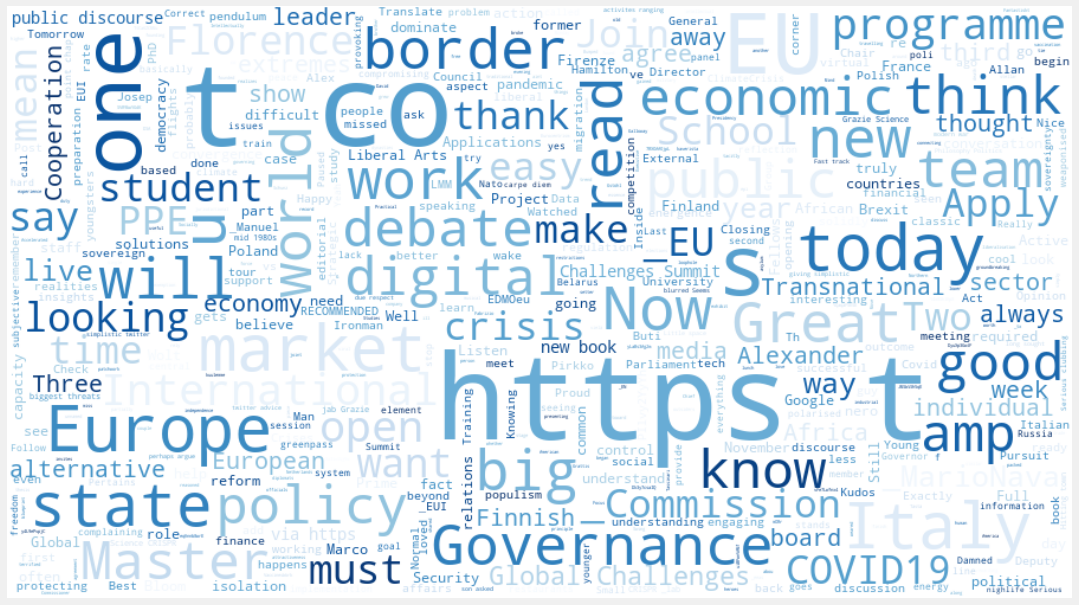

In [17]:
# plotting word cloud

from wordcloud import WordCloud

## plot word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
#wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
#plt.imshow(wordCloud,interpolation='bilinear' )
#plt.axis('off')
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      background_color='white',
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(allWords)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Plotting scatter graph between polarity and subjectivity

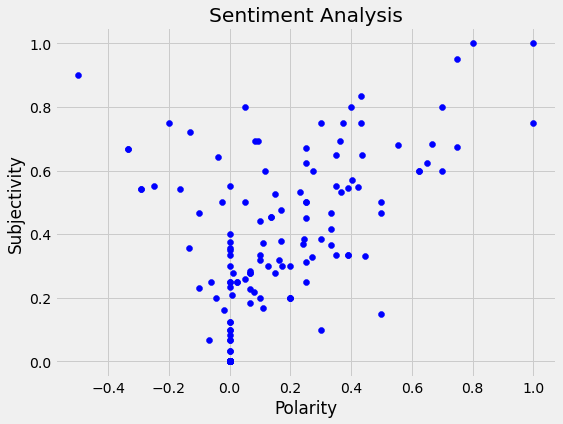

In [18]:
## plotting polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Red dots represent negative tweets, green dots represent positive tweets and remaining blue dots are neutral tweets.

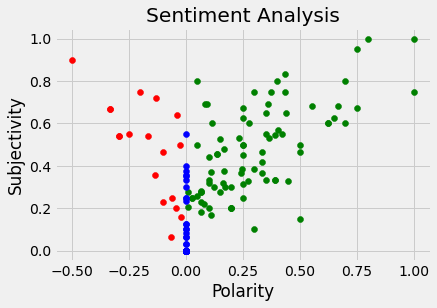

In [19]:
# visualising the sentiment analysis with dots

for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Plotting positive and negative tweets using bar graph

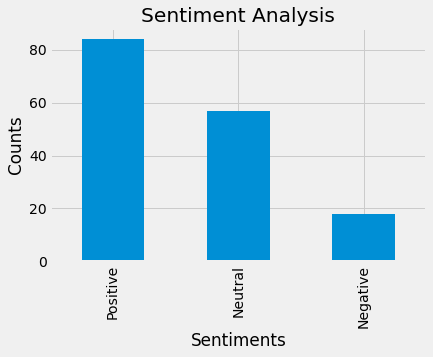

In [20]:
# Positive and negative tweets and plotting bar graph

ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

As you can see, from the above bar graph we can conclude that there are more positive tweets than negative tweets.